# Phase 3 DS3000 Project

## Group Members: Anya Wild, Janina Kurowski, Michael Hrinda, Elana von der Heyden

For the Phase 3 'proof-of-concept' for a ML implentation using our data set, we chose to perform linear regression and check assumptions. We referred to the correlation heat map we created for Phase 2 and discussed which variables we may want to use as x and y features for the linear regression. Although fire radiative power (FRP) and the fourth spectral channel (bright_ti4) had a strong correlation, this was not extremely helpful, considering it is pretty intuitive that a fire with more radiative power would be picked up as brighter by a spectral channel. We noticed somewhat of a possible correlation between date (acq_date) and bright_ti4 though, which we found interesting. With a machine learning model, we could possibly predict the intensity/brightness of a fire based on the date, which aligns well with some of the questions we asked when initially considering the data set. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/anyawild/DS3000_Final_Project_Team2/refs/heads/main/euro_c_df_clean.csv'
euro_c_df_clean = pd.read_csv(url)

intercept = 4.257, slope = -0.001


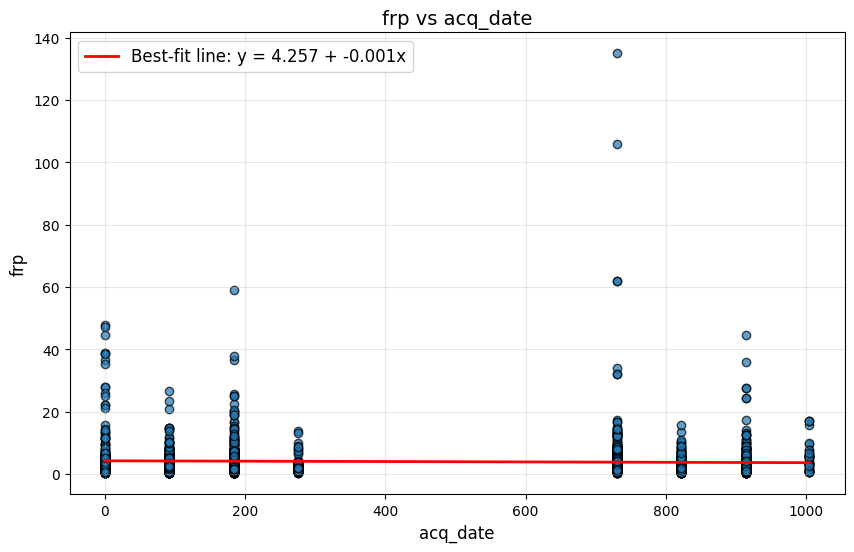

In [4]:
# acq_date as the feature variable doesn't produce a good linear model

x_df = euro_c_df_clean['acq_date']
x_datetime = pd.to_datetime(x_df)
reference_date = pd.Timestamp(x_df.min())                       # earliest date, '2020-03-01'
x_timedelta = x_datetime - reference_date

# number of days between data collection and reference date
x_days = x_timedelta.dt.days

x = x_days.to_numpy()                                           # x: days since 2020-03-01
X = np.hstack([np.ones((x.shape[0], 1)), x.reshape(-1, 1)])     # X has a bias (1's) column
y = euro_c_df_clean['frp'].to_numpy()                           # y: frp

# solves (X^T X) m = (X^T y) for m
m = np.linalg.solve(np.matmul(X.T, X), np.matmul(X.T, y))

print(f'intercept = {round(m[0], 3)}, slope = {round(m[1], 3)}')

# scatterplot of frp vs acq_date with best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, edgecolor='k')
plt.plot(x, m[0] + m[1] * x, color='red', linewidth=2, label=f'Best-fit line: y = {round(m[0], 3)} + {round(m[1], 3)}x')  # Best-fit line
plt.title('frp vs acq_date', fontsize=14)
plt.xlabel('acq_date', fontsize=12)
plt.ylabel('frp', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

intercept = -41.292, slope = 0.141


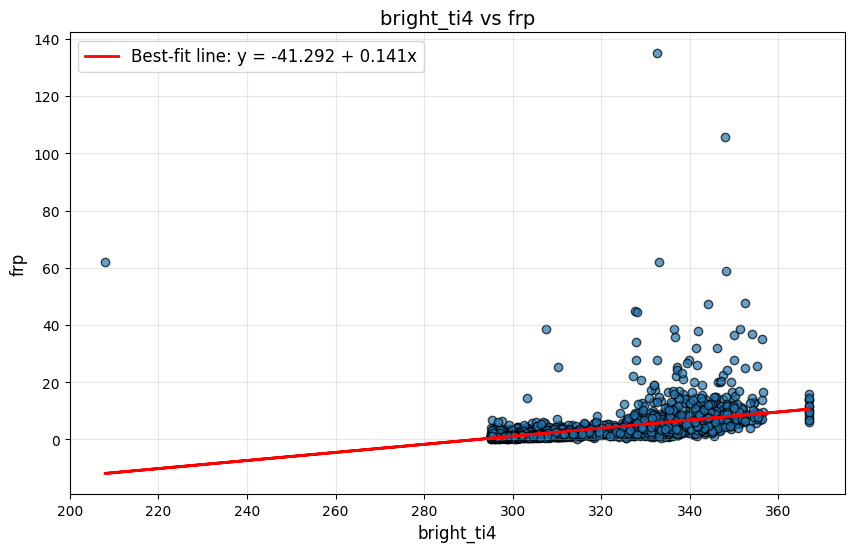

In [5]:
x = euro_c_df_clean['bright_ti4'].to_numpy()                    # x: bright_ti4
X = np.hstack([np.ones((x.shape[0], 1)), x.reshape(-1, 1)])     # X has a bias (1's) column
y = euro_c_df_clean['frp'].to_numpy()                           # y: frp

# solves (X^T X) m = (X^T y) for m
m = np.linalg.solve(np.matmul(X.T, X), np.matmul(X.T, y))

print(f'intercept = {round(m[0], 3)}, slope = {round(m[1], 3)}')

# scatterplot of frp vs bright_ti4 with best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, edgecolor='k')
plt.plot(x, m[0] + m[1] * x, color='red', linewidth=2, label=f'Best-fit line: y = {round(m[0], 3)} + {round(m[1], 3)}x')  # Best-fit line
plt.title('bright_ti4 vs frp', fontsize=14)
plt.xlabel('bright_ti4', fontsize=12)
plt.ylabel('frp', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

intercept = -43.167, slope = 0.147


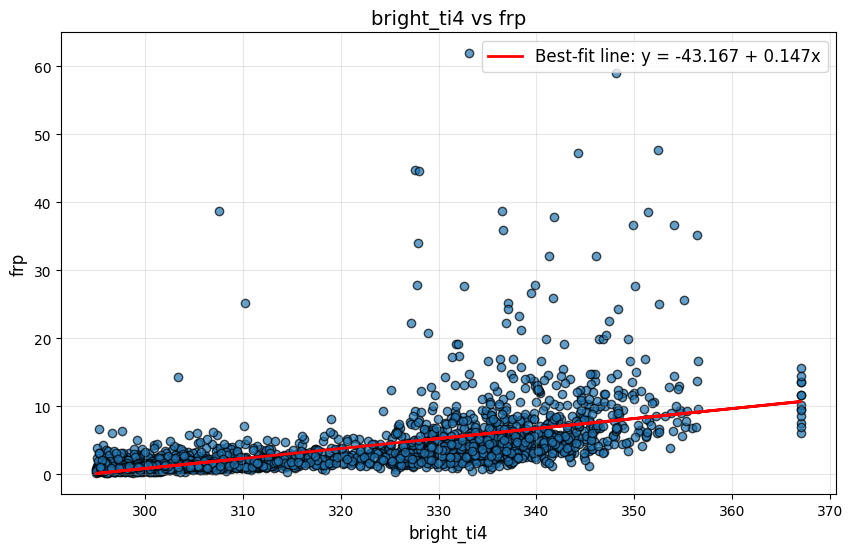

In [6]:
# remove observations with bright_ti4 < 250 or frp > 100
outlier_indices = euro_c_df_clean[(euro_c_df_clean['bright_ti4'] < 250) |
                                  (euro_c_df_clean['frp'] > 100)].index
outliers_removed_df = euro_c_df_clean.drop(index=outlier_indices)

x = outliers_removed_df['bright_ti4'].to_numpy()                # x: bright_ti4
X = np.hstack([np.ones((x.shape[0], 1)), x.reshape(-1, 1)])     # X has a bias (1's) column
y = outliers_removed_df['frp'].to_numpy()                       # y: frp

# solves (X^T X) m = (X^T y) for m
m = np.linalg.solve(np.matmul(X.T, X), np.matmul(X.T, y))

print(f'intercept = {round(m[0], 3)}, slope = {round(m[1], 3)}')

# scatterplot of frp vs bright_ti4 with best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, edgecolor='k')
plt.plot(x, m[0] + m[1] * x, color='red', linewidth=2, label=f'Best-fit line: y = {round(m[0], 3)} + {round(m[1], 3)}x')  # Best-fit line
plt.title('bright_ti4 vs frp', fontsize=14)
plt.xlabel('bright_ti4', fontsize=12)
plt.ylabel('frp', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

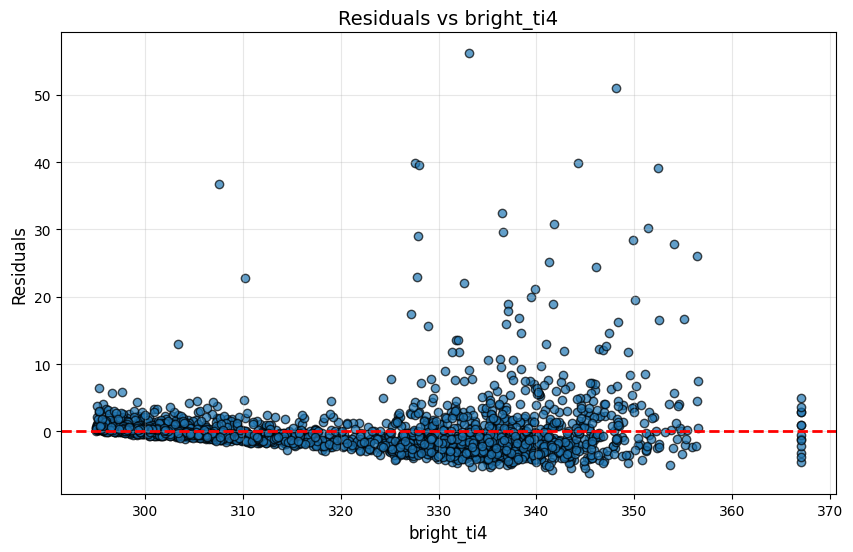

In [7]:
# Calculate residuals
residuals = y - (m[0] + m[1] * x)

# Plot residuals vs. x-values
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Horizontal line at 0
plt.title('Residuals vs bright_ti4', fontsize=14)
plt.xlabel('bright_ti4', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

This residuals vs bright_ti4 (x values) plot depicts residuals that are mostly scattered fairly evenly along the x-axis (shown by the red dashed line), which would suggest that the model captures the x-values fairly decently. There are no obvious shapes or patterns that raise significant concern, although the residuals do seem to be more tightly clustered at the smaller bright_ti4 values, and variance seems to increase slightly as the bright_ti4 values increase. This may suggest that the model is less acurate in predicting higher values. Additionally, there are some outliers, which could potentially distort the regression results. It may serve to take a closer look at the data set and attempt to identify why these outliers may have occured. Generally though, this plot doesn't suggest that the model would perform incredibly poorly.

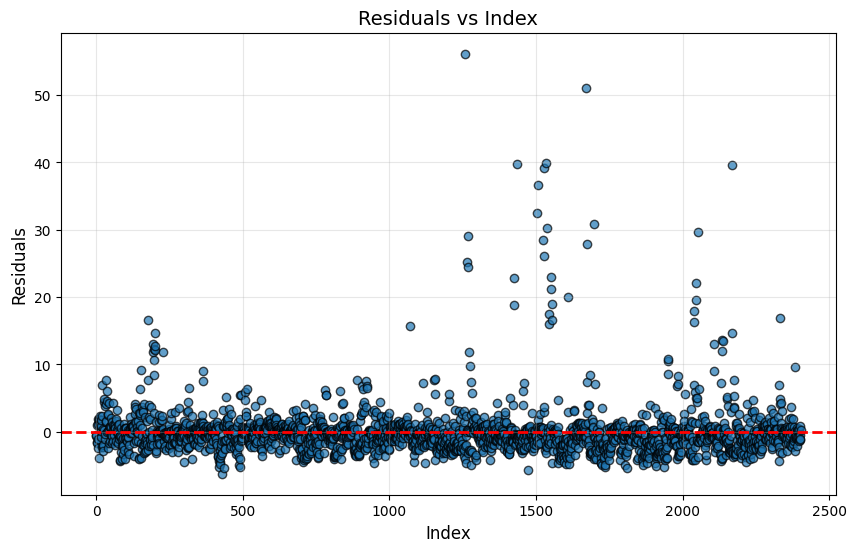

In [8]:
# index vs. residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(x)), residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Horizontal line at 0
plt.title('Residuals vs Index', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

A plot of residuals vs. corresponding index allows us to assess whether or not there exists an autocorrelation in our model. In this case, we can see that a large majority of the data is congregated around the horizontal zero line, but there are outliers above the line, similar to the residuals vs. bright_ti4. This plot thus suggests there may be an unwanted relationship between the data and its ordering, but it is important to state again that mose of the data is around the zero line as it should be.